**백 테이터**

[('1', '견우와 선녀', '드라마 · 2025', 'https://file.kinolights.com/m/content_poster/202505/26/b794340f-c0e6-4a76-8525-aa0fdd86ea5d.webp'), ('2', 'S라인', '드라마 · 2025', ''), ('3', '굿보이', '드라마 · 2025', 'https://file.kinolights.com/m/content_poster/202506/24/50645945-a0e0-4624-ad54-28fb8bf61f26.webp'), ('4', 'F1 더 무비', '영화 · 2025', ''), ('5', '서초동', '드라마 · 2025', 'https://file.kinolights.com/m/content_poster/202505/21/55f9a4fc-2d9f-4b15-9e73-256525487f4e.webp'), ('6', '슈퍼맨', '영화 · 2025', ''), ('7', '노이즈', '영화 · 2025', 'https://file.kinolights.com/m/content_poster/202506/05/c44017f7-b50a-41af-930e-c26a07341472.webp'), ('8', '케이팝 데몬 헌터스', '영화 · 2025', ''), ('9', '괴기열차', '영화 · 2025', 'https://file.kinolights.com/m/content_poster/202506/09/71296c8b-68bc-4c06-bc1f-21ca0518efc1.webp'), ('10', '살롱 드 홈즈', '드라마 · 2025', ''), ('11', '킹 오브 킹스', '애니메이션, 영화 · 2025', 'https://file.kinolights.com/m/content_poster/202505/19/6db5bc71-a70b-4e74-8f1a-57c52eff6d86.webp'), ('12', '쥬라기 월드: 새로운 시작', '영화 · 2025', ''), ('
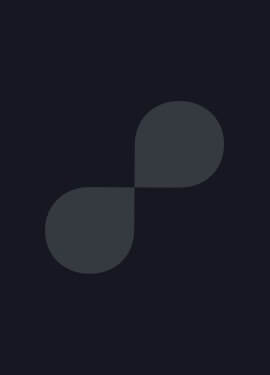
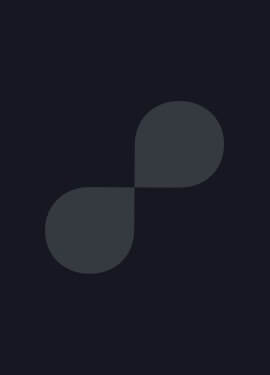
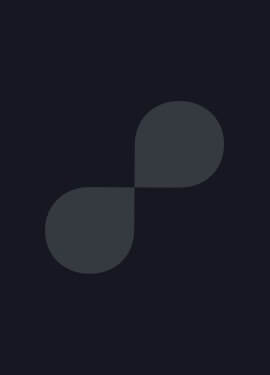
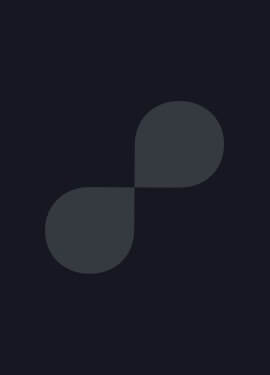
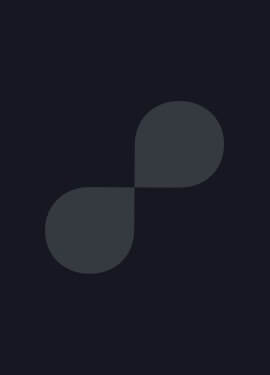
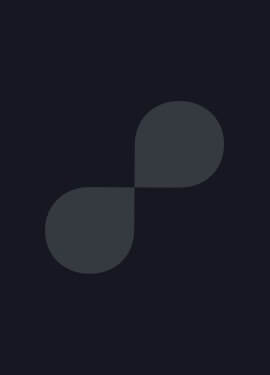
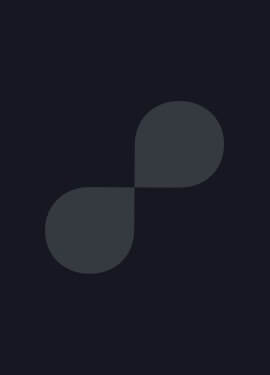
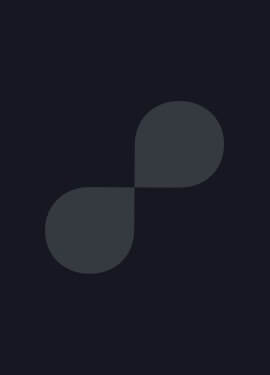
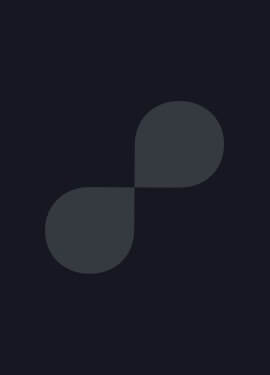
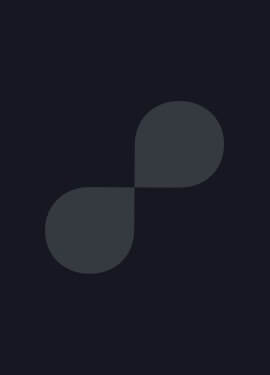
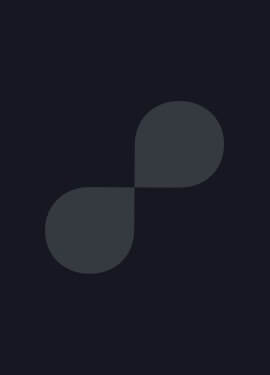
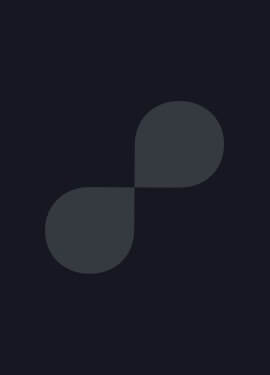
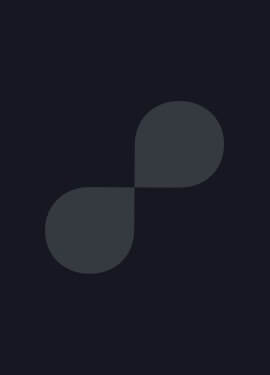
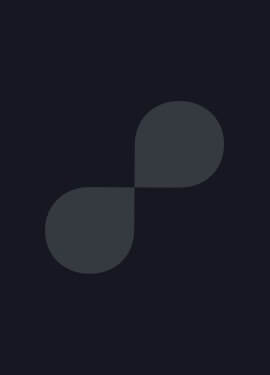
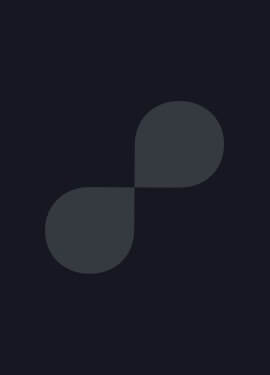
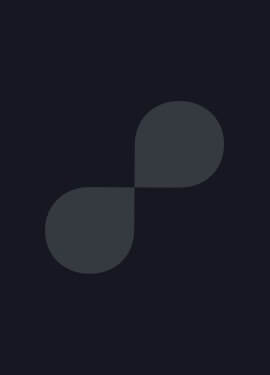
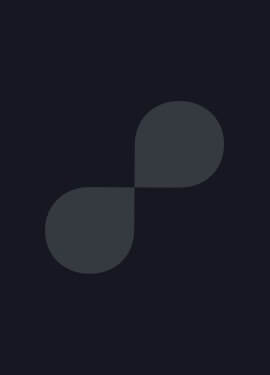
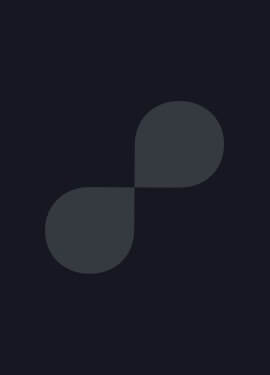
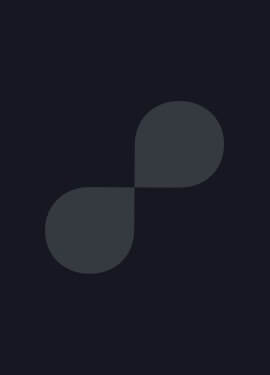
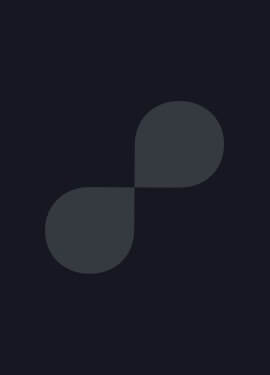
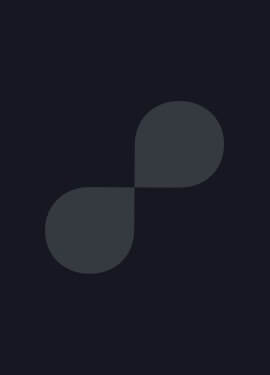
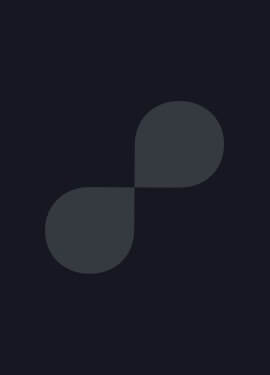
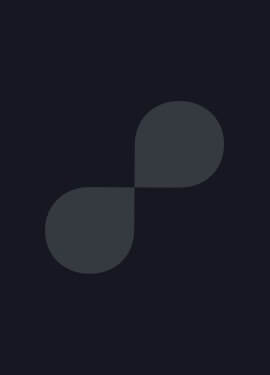
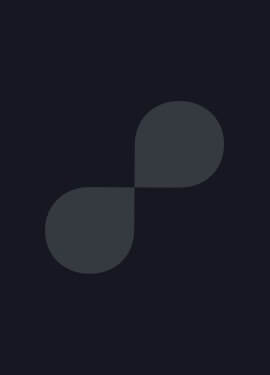
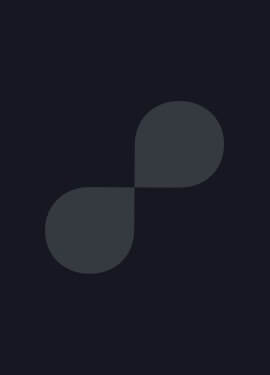
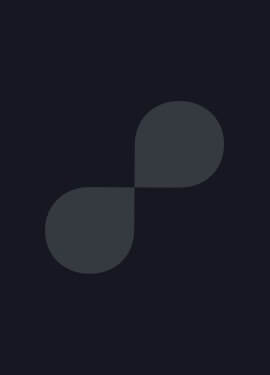
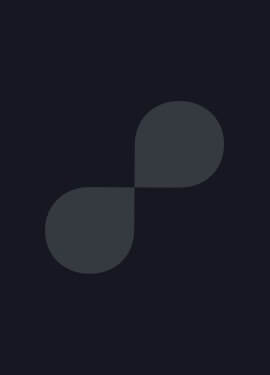
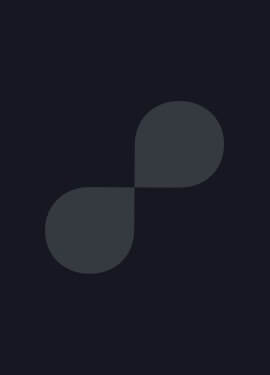
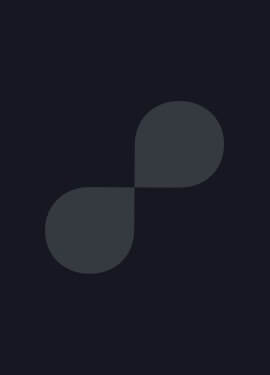
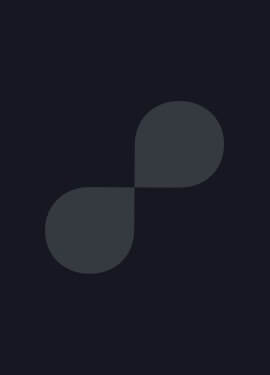
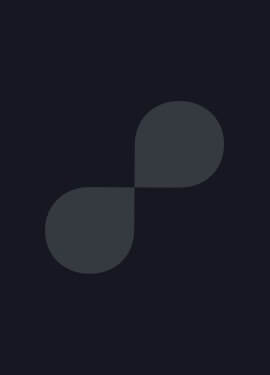
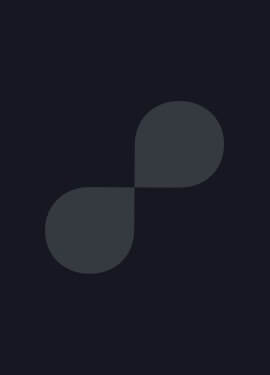
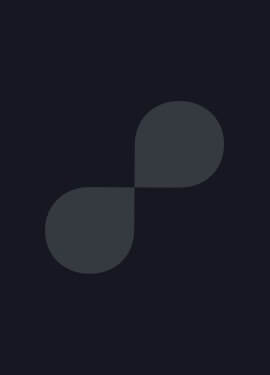
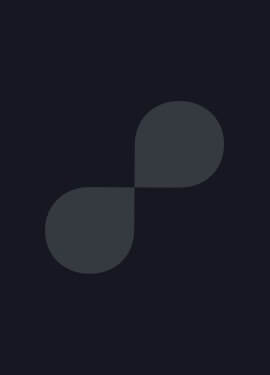
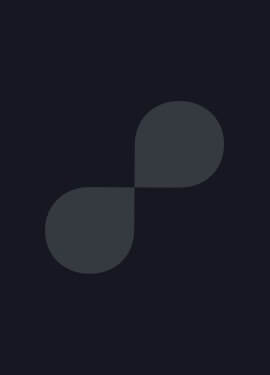
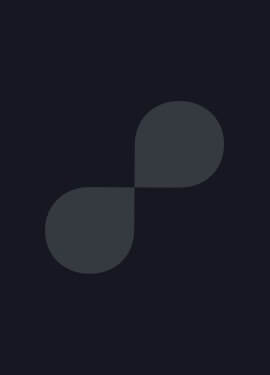
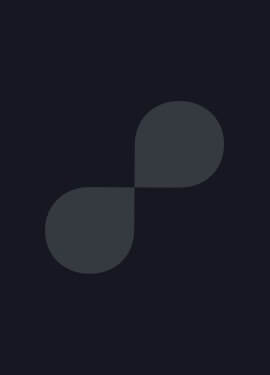
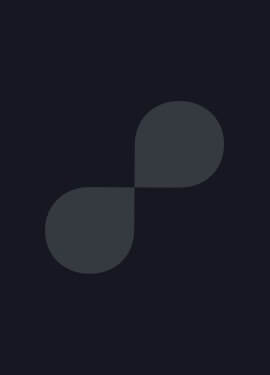
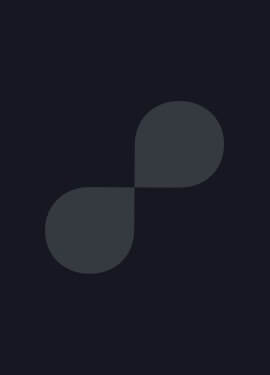
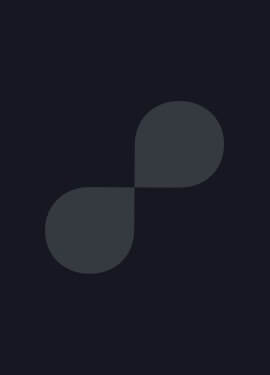
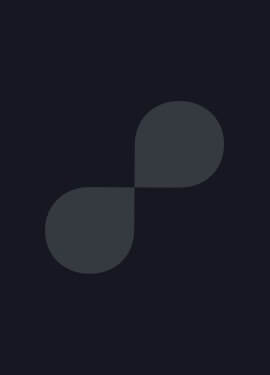
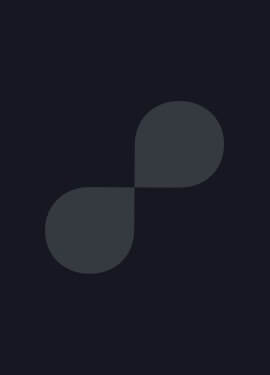
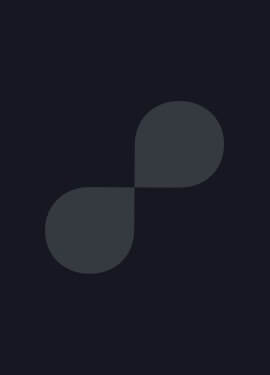
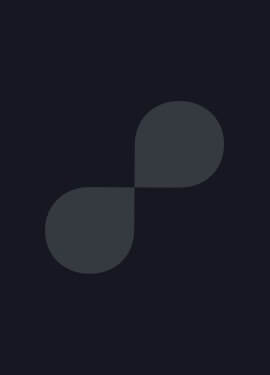
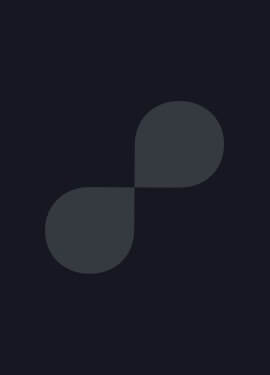
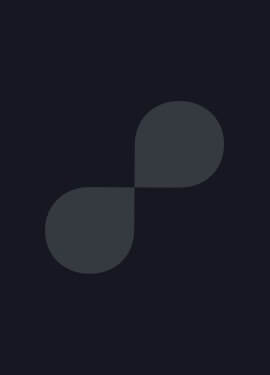
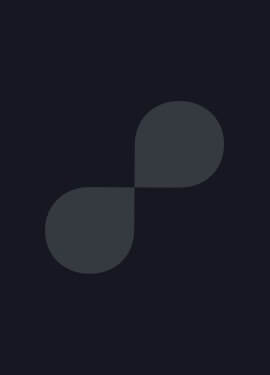
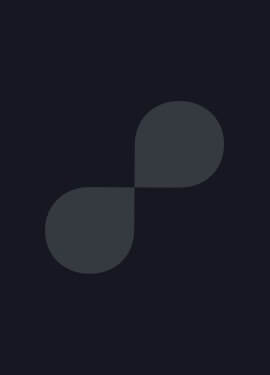
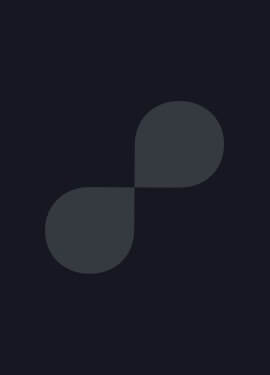
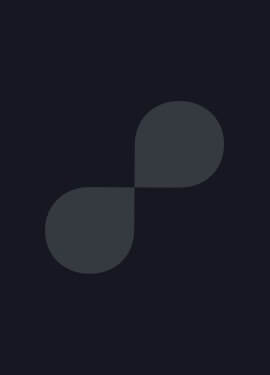

In [ ]:
# 1. 키노라이츠 - 트랜드 랭킹 스크레이핑
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# [1. 페이지 요청]
url = 'https://m.kinolights.com/ranking/kino'
driver = webdriver.Chrome(options=options)
driver.get(url)
time.sleep(3)

# [2. html 파싱]
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# [3. 정보 가져오기]
# 랭킹 순위
rankNum = soup.select('#contents .content-ranking-list .rank__number span')
rankNum = [num.get_text(strip=True) for num in rankNum]
# 제목
title = soup.select('#contents .content-ranking-list .info__title span')
title = [t.get_text(strip=True) for t in title]
# 장르, 방송일
type = soup.select('#contents .content-ranking-list .info__subtitle span')
type = [t.get_text(strip=True) for t in type]
# 포스터 이미지
poster_img = soup.select('ul.content-ranking-list img.image-container__image')
poster_img = [img['src'] for img in poster_img if img.has_attr('src')]
# 각 데이터 합치기
ranklist = list(zip(rankNum, title, type, poster_img))
print(ranklist)

# 파일로 저장
# with open('page.html', 'w', encoding='utf-8') as f:
#     f.write(html)

driver.quit()